In [1]:
import pandas as pd
import numpy as np

In [2]:
df_property = pd.read_csv('../data/processed/NeighborhoodValue2.csv')
df_cases = pd.read_csv('../data/processed/cases.csv')

df_dp = pd.read_csv('../data/processed/damagedProperty.csv')
df_fire = pd.read_csv('../data/processed/fireIncidents.csv')
df_homeless = pd.read_csv('../data/processed/homelessConcerns.csv')
df_illegal = pd.read_csv('../data/processed/illegalPostings.csv')
df_noise=pd.read_csv('../data/processed/noiseReports.csv')
df_eviction = pd.read_csv('../data/processed/Eviction.csv')
df_incidents = pd.read_csv('../data/processed/incidents.csv')
df_graffiti = pd.read_csv('../data/processed/graffiti.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,15,18,19,20,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_property.dtypes

RegionName     object
mean          float64
dtype: object

In [4]:
df_property.RegionName.unique()


array(['Outer Sunset', 'Mission', 'Outer Richmond', 'Inner Richmond',
       'Parkside', 'South of Market', 'Excelsior', 'Pacific Heights',
       'Bernal Heights', 'Nob Hill', 'Portola', 'Western Addition',
       'Bayview', 'Potrero Hill', 'Noe Valley', 'Inner Sunset',
       'Visitacion Valley', 'Crocker Amazon', 'Golden Gate Heights',
       'Marina', 'Ingleside', 'Mission Terrace', 'Silver Terrace',
       'Oceanview', 'North Beach', 'Lone Mountain', 'Sunnyside',
       'Outer Mission', 'Panhandle', 'Buena Vista', 'Ingleside Heights',
       'Lower Pacific Heights', 'South Beach', 'Haight',
       'Presidio Heights', 'Laurel Heights', 'Hayes Valley',
       'Upper Market', 'Miraloma Park', 'Lakeshore', 'Cow Hollow',
       'Glen Park', 'Telegraph Hill', 'Lake', 'Downtown',
       'Diamond Heights', 'Stonestown', 'Westwood Park',
       'Ingleside Terrace', 'Forest Hill', 'Corona Heights',
       'Midtown Terrace', 'Little Hollywood', 'North Waterfront',
       'Forest Knolls', 'Se

In [5]:
ngbh_dist = {'Outer Sunset': '4', 'Mission': '9', 'Outer Richmond': '1', 'Inner Richmond': '1',
       'Parkside': '4', 'South of Market': '6', 'Excelsior': '11', 'Pacific Heights': '2',
       'Bernal Heights': '9', 'Nob Hill': '3', 'Portola': '9', 'Western Addition': '5',
       'Bayview': '10', 'Potrero Hill': '10', 'Noe Valley': '8', 'Inner Sunset': '5',
       'Visitacion Valley': '10', 'Crocker Amazon': '11', 'Golden Gate Heights': '7',
       'Marina': '2', 'Ingleside': '11', 'Mission Terrace': '11', 'Silver Terrace': '10',
       'Oceanview': '11', 'North Beach': '3', 'Lone Mountain': '1', 'Sunnyside': '7',
       'Outer Mission': '11', 'Panhandle': '5', 'Buena Vista': '8', 'Ingleside Heights': '11',
       'Lower Pacific Heights': '5', 'South Beach': '6', 'Haight': '5',
       'Presidio Heights': '2', 'Laurel Heights': '2', 'Hayes Valley': '5',
       'Upper Market': '6', 'Miraloma Park': '7', 'Lakeshore': '7', 'Cow Hollow': '2',
       'Glen Park': '8', 'Telegraph Hill': '3', 'Lake': '2', 'Downtown': '3',
       'Diamond Heights': '8', 'Stonestown': '7', 'Westwood Park': '7',
       'Ingleside Terrace': '7', 'Forest Hill': '7', 'Corona Heights': '8',
       'Midtown Terrace':'7', 'Little Hollywood':'10', 'North Waterfront': '3',
       'Forest Knolls': '7', 'Seacliff': '2', 'St. Francis Wood':'7',
       'Mount Davidson Manor': '7', 'Westwood Highlands': '7'}
df_property["SupervisorDistrict"] = df_property["RegionName"].apply(lambda x: ngbh_dist.get(x))
df_property

,RegionName,mean,SupervisorDistrict
0,Outer Sunset,6.828942e+05,4
1,Mission,7.715561e+05,9
2,Outer Richmond,7.878745e+05,1
3,Inner Richmond,1.071025e+06,1
4,Parkside,7.544167e+05,4
5,South of Market,6.051463e+05,6
6,Excelsior,5.782389e+05,11
7,Pacific Heights,1.268102e+06,2
8,Bernal Heights,7.822644e+05,9
9,Nob Hill,9.400329e+05,3


In [6]:
df_property=df_property.rename(columns={"mean": "Average"})
df_Avg=df_property.groupby(df_property['SupervisorDistrict'], as_index=False).Average.mean()

In [7]:
df_Avg=df_Avg.sort_values(by='Average',ascending=False)
df_Avg

,SupervisorDistrict,Average
3,2,1.813547e+06
8,7,9.609620e+05
0,1,9.447267e+05
9,8,8.980749e+05
6,5,7.988522e+05
7,6,7.396675e+05
4,3,7.353816e+05
10,9,7.191349e+05
5,4,7.186555e+05
2,11,5.767374e+05


In [8]:
sd=list(df_Avg['SupervisorDistrict'])
avg=list(df_Avg['Average'])

In [9]:
dict = {'SupervisorDistrict': sd, 'AveragePropertyValue': avg}
df = pd.DataFrame((dict),index=sd)
df['SupervisorDistrict']=df['SupervisorDistrict'].astype(int)

In [10]:
df=df.sort_values(by='SupervisorDistrict',ascending=True)

In [11]:
df_graffiti=df_graffiti.rename(columns={"Supervisor District": "SupervisorDistrict"})
graffiti_districts = df_graffiti.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
gd=list(graffiti_districts)

df_dp=df_dp.rename(columns={"Supervisor District": "SupervisorDistrict"})
dp_districts = df_dp.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
dp=list(dp_districts)

df_fire=df_fire.rename(columns={"Supervisor District": "SupervisorDistrict"})
fire_districts = df_fire.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
fire=list(fire_districts)

df_homeless=df_homeless.rename(columns={"Supervisor District": "SupervisorDistrict"})
homeless_districts = df_homeless.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
homeless=list(homeless_districts)

df_noise=df_noise.rename(columns={"Supervisor District": "SupervisorDistrict"})
noise_districts = df_noise.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
noise=list(noise_districts)

df_eviction=df_eviction.rename(columns={"Supervisor District": "SupervisorDistrict"})
eviction_districts = df_eviction.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
ev=list(eviction_districts)

df_illegal=df_illegal.rename(columns={"Supervisor District": "SupervisorDistrict"})
illegal_districts = df_illegal.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
illegal=list(illegal_districts)

In [12]:
df['Grafiti']=gd
df['DamagedProperty']=dp
df['Homeless']=homeless
df['Noise']=noise
df['Eviction']=ev
df['Illegal']=illegal

In [13]:
df

,SupervisorDistrict,AveragePropertyValue,Grafiti,DamagedProperty,Homeless,Noise,Eviction,Illegal
1,1,9.447267e+05,43387,5783,1593,1064,3292,8644
2,2,1.813547e+06,22126,6615,980,1547,3274,6046
3,3,7.353816e+05,56483,25783,3805,3036,3712,2817
4,4,7.186555e+05,20066,3289,175,822,2548,2769
5,5,7.988522e+05,92972,11489,2490,2572,4544,16628
6,6,7.396675e+05,61470,28170,8850,5448,4176,3345
7,7,9.609620e+05,15784,3854,126,527,3346,3215
8,8,8.980749e+05,57158,6002,3562,2379,5151,7960
9,9,7.191349e+05,98330,8609,4208,2762,4522,4815
10,10,5.662365e+05,27282,3909,2986,1743,2363,2330


In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

labels = df['AveragePropertyValue']
features = df[['Grafiti', 'DamagedProperty', 'Homeless','Noise','Eviction','Illegal']]
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size=0.20)
# Model the data
model = LinearRegression()
model.fit(train_features, train_labels)
model.score(test_features, test_labels)

-265566.79771862616

In [15]:
import seaborn as sns
pred_labels = model.predict(test_features) 
# Plot prediction and actual data
sns.regplot(x = test_labels, 
            y = pred_labels, 
            data = model,
            line_kws={"color":"orange","alpha":0.5,"lw":2}
           )

In [16]:
colList=list(df.columns)
list1=[]
for x in range(2, len(colList)):
    list1.append(colList[x])
list1

['Grafiti', 'DamagedProperty', 'Homeless', 'Noise', 'Eviction', 'Illegal']

In [17]:
df2 = df.loc[:, list1]
df['TotalIncidents'] = df2.sum(axis=1)
df

,SupervisorDistrict,AveragePropertyValue,Grafiti,DamagedProperty,Homeless,Noise,Eviction,Illegal,TotalIncidents
1,1,9.447267e+05,43387,5783,1593,1064,3292,8644,63763
2,2,1.813547e+06,22126,6615,980,1547,3274,6046,40588
3,3,7.353816e+05,56483,25783,3805,3036,3712,2817,95636
4,4,7.186555e+05,20066,3289,175,822,2548,2769,29669
5,5,7.988522e+05,92972,11489,2490,2572,4544,16628,130695
6,6,7.396675e+05,61470,28170,8850,5448,4176,3345,111459
7,7,9.609620e+05,15784,3854,126,527,3346,3215,26852
8,8,8.980749e+05,57158,6002,3562,2379,5151,7960,82212
9,9,7.191349e+05,98330,8609,4208,2762,4522,4815,123246
10,10,5.662365e+05,27282,3909,2986,1743,2363,2330,40613


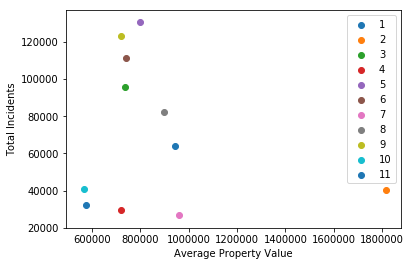

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['AveragePropertyValue'],row['TotalIncidents'],label=name)

plt.xlabel('Average Property Value')
plt.ylabel('Total Incidents')
plt.legend()
plt.show()

In [20]:
X = df['AveragePropertyValue'].values.reshape(-1,1)
y = df['TotalIncidents'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = regressor.predict(X_test)
y_pred

array([[66786.65629053],
       [72532.55949804],
       [68354.46130461]])

In [23]:
y_pred = [y for x in y_pred for y in x]
y_test = [y for x in y_test for y in x]
X_test = [y for x in X_test for y in x]
X_train = [y for x in X_train for y in x]
y_train = [y for x in y_train for y in x]

In [24]:
dict = {'Actual': y_test, 'Predicted': y_pred}   
df_pred = pd.DataFrame(dict) 
df_pred

,Actual,Predicted
0,130695,66786.656291
1,40613,72532.559498
2,95636,68354.461305


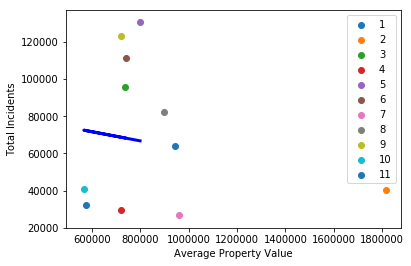

In [25]:
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['AveragePropertyValue'],row['TotalIncidents'],label=name)
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Average Property Value')
plt.ylabel('Total Incidents')
plt.legend()
plt.show()

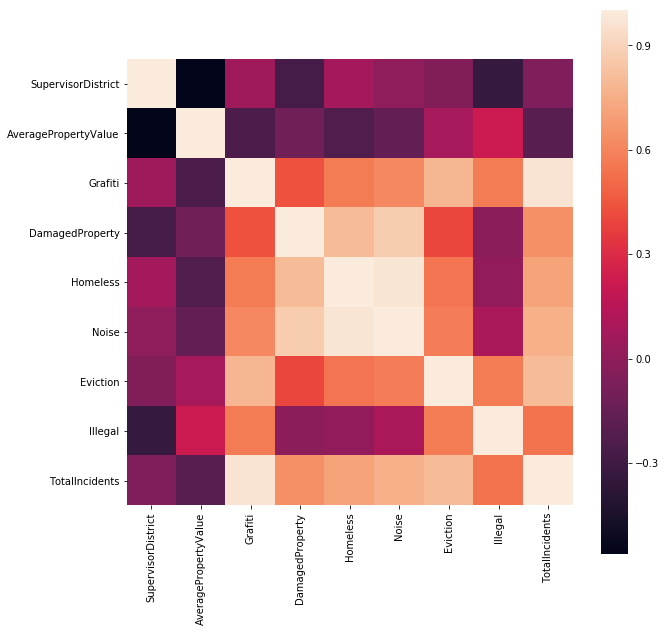

In [37]:
colList=list(df.columns)
fig, ax = plt.subplots(figsize=(10,10))
cl = df[colList].corr()
sns.heatmap(cl, square = True, ax=ax)

In [31]:
from statistics import mean
import numpy as np

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

-0.02298079729682048 90425.50562078538


In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = list(df['AveragePropertyValue'])
y = list(df['TotalIncidents'])
x = np.array(X).reshape((-1, 1))
y = np.array(y)
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.039263790819962445


In [33]:
xs = np.array(list(df['AveragePropertyValue']))
ys = np.array(list(df['TotalIncidents']))

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

-0.02298079729682048 90425.50562078538


In [34]:
regression_line = [(m*x)+b for x in xs]

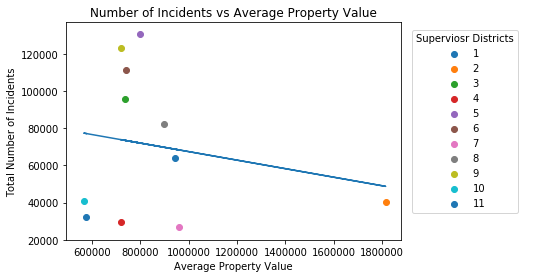

In [36]:
for name,row in df.iterrows():
  plt.scatter(row['AveragePropertyValue'],row['TotalIncidents'], label=name)

plt.title("Number of Incidents vs Average Property Value")
plt.xlabel('Average Property Value')
plt.ylabel('Total Number of Incidents')
plt.legend(title="Supervisor Districts")
plt.plot(xs, regression_line)
#plt.xlim([.03, .19])
#plt.ylim([.03, .19])
leg = plt.legend( loc = 'upper right', title="Superviosr Districts")

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()

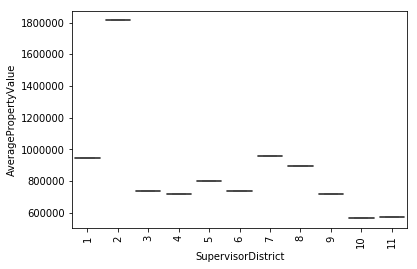

In [40]:
plt.xticks(rotation=90)
country_firstleague_ranks = sns.boxplot(x="SupervisorDistrict", y="AveragePropertyValue", data=df)

In [39]:
df

,SupervisorDistrict,AveragePropertyValue,Grafiti,DamagedProperty,Homeless,Noise,Eviction,Illegal,TotalIncidents
name,,,,,,,,,
1,1,9.447267e+05,43387,5783,1593,1064,3292,8644,63763
2,2,1.813547e+06,22126,6615,980,1547,3274,6046,40588
3,3,7.353816e+05,56483,25783,3805,3036,3712,2817,95636
4,4,7.186555e+05,20066,3289,175,822,2548,2769,29669
5,5,7.988522e+05,92972,11489,2490,2572,4544,16628,130695
6,6,7.396675e+05,61470,28170,8850,5448,4176,3345,111459
7,7,9.609620e+05,15784,3854,126,527,3346,3215,26852
8,8,8.980749e+05,57158,6002,3562,2379,5151,7960,82212
9,9,7.191349e+05,98330,8609,4208,2762,4522,4815,123246
